# Were the B0s correctly reconstructed?
We can find out by plotting the distribution of the `Mbc` which should peak at the B meson mass

In [1]:
# Include this only if running in a Jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt
from root_pandas import read_root

Welcome to JupyROOT 6.20/04


In [2]:
filenumber = 0
filename = f"FEI_B_charged_hadronic_{filenumber}.root"

In [4]:
df = read_root(filename)
df

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,Mbc,deltaE,decayModeID,SigProb,mcErrors,isSignal,FEIProbRank
0,1003,0,1,0,17,1.0,5.272284,0.191716,28.0,2.179087e-04,304.0,0.0,2.0
1,1003,0,1,1,17,1.0,5.229051,-0.038224,26.0,1.818618e-04,432.0,0.0,3.0
2,1003,0,1,2,17,1.0,5.261985,0.271724,28.0,6.043832e-05,304.0,0.0,4.0
3,1003,0,1,3,17,1.0,5.216648,0.159208,26.0,4.796307e-05,432.0,0.0,5.0
4,1003,0,1,4,17,1.0,5.273010,-0.063690,26.0,4.644469e-05,432.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61304,1003,0,10000,3,8,1.0,5.269134,0.225321,28.0,1.338211e-04,376.0,0.0,1.0
61305,1003,0,10000,4,8,1.0,5.274943,0.152393,28.0,7.318096e-05,376.0,0.0,2.0
61306,1003,0,10000,5,8,1.0,5.280323,0.194066,28.0,4.640121e-06,504.0,0.0,6.0
61307,1003,0,10000,6,8,1.0,5.212812,0.402079,26.0,5.525101e-07,504.0,0.0,7.0


We will just plot in the range 5.15 – 5.3 GeV.

/cvmfs/belle.cern.ch/el7/externals/v01-09-01/Linux_x86_64/common/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/cvmfs/belle.cern.ch/el7/externals/v01-09-01/Linux_x86_64/common/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Number of candidates')

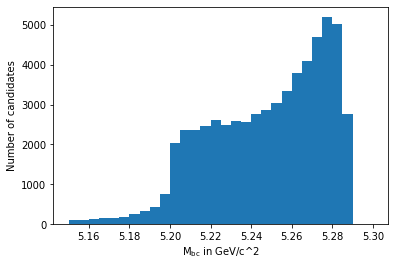

In [3]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df['Mbc'], bins=30, range=(5.15, 5.3))
ax.set_xlabel(r'$\mathrm{M}_{\mathrm{bc}}$ in GeV/c^2')
ax.set_ylabel('Number of candidates')

The distribution doesn't look correct because we are not even querying the particles with the highest probabilities:

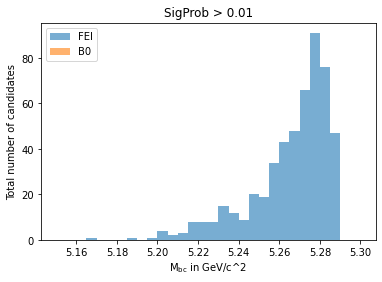

In [9]:
# query
sig_prob_cut_df = df.query('(SigProb > 0.01) & (FEIProbRank == 1)')
correct_results_mc = df.query("isSignal == 1")

# plot
fig, ax = plt.subplots()
ax.hist(sig_prob_cut_df['Mbc'], bins=30, range=(5.15, 5.3), label="FEI", alpha=0.6)
ax.hist(correct_results_mc['Mbc'], bins=30, range=(5.15, 5.3), label="B0", alpha=0.6)
ax.set_xlabel(r'$\mathrm{M}_{\mathrm{bc}}$ in GeV/c^2')
ax.set_ylabel('Total number of candidates')
ax.set_title('SigProb > 0.01')
ax.legend()